In [34]:
print("OM SAI NAMAH SHIVAYA")


OM SAI NAMAH SHIVAYA


In [35]:
import numpy as np
import math
v1 = np.random.rand(6)
v2 = np.random.rand(6)
angle_12 = math.acos(np.dot(v1,v2)/(np.linalg.norm(v1,2) * np.linalg.norm(v2,2)))
print(angle_12)

0.4729278968531052


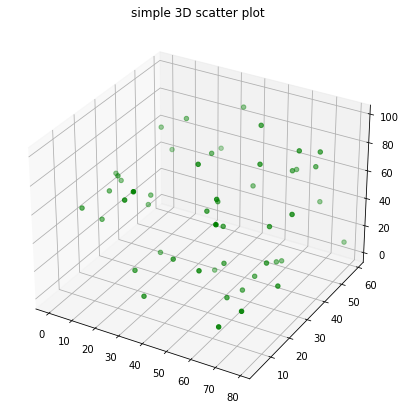

In [36]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
 
# Creating dataset
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [37]:
df_mnist = pd.read_csv("mnist_train.csv")
df_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
l = df_mnist["label"]
d = df_mnist.drop("label", axis = 1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


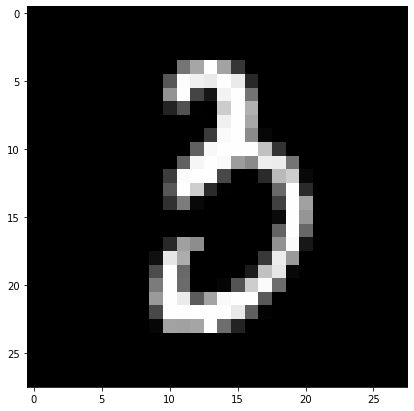

3


In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
idx = 150
grid_data = d.iloc[idx].to_numpy().reshape(28,28) 
plt.imshow(grid_data, interpolation = None,cmap = "gray")
plt.show()
print(l[idx])

In [41]:
labels = l.head(15000)
data = d.head(15000)
print("the shape of the sample data is :", data.shape)


the shape of the sample data is : (15000, 784)


In [42]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [43]:
# find the covariance matrix which is A.T * T
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
print("The covariance of matrix is :", covar_matrix.shape)

The covariance of matrix is : (784, 784)


In [44]:
# finding the two eigen values and the corresponding eigen vectors
from scipy.linalg import eigh

#the parameter eigvals is defined (low value to high value)
#eigh function will return the eigen values is ascending order
#this code generates only the top 2 (782 and 783) eigen values

values,vectors = eigh(covar_matrix, eigvals = (782,783))
print("The shape of eigen vectors =", vectors.shape)
vectors  = vectors.T
print("The updated Eigen vector is :",vectors.shape)


The shape of eigen vectors = (784, 2)
The updated Eigen vector is : (2, 784)


In [45]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("The resultant new data points shape is", vectors.shape,"X",sample_data.shape,"=",new_coordinates.shape)

The resultant new data points shape is (2, 784) X (15000, 784) = (2, 15000)


In [46]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates,labels)).T
dataframe = pd.DataFrame(data = new_coordinates, columns = ("Ist Principle","2nd Principle", "Label"))
print(dataframe.head())

   Ist Principle  2nd Principle  Label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\Public\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


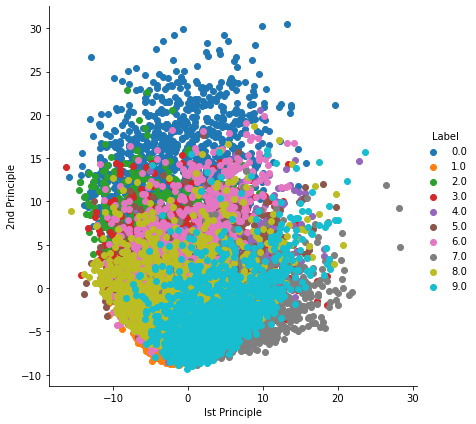

In [47]:
import seaborn as sn
sn.FacetGrid(dataframe, hue = "Label", size = 6).map(plt.scatter,"Ist Principle","2nd Principle").add_legend()
plt.show()

In [48]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("shape of pca_Reduced =", pca_data.shape)

shape of pca_Reduced = (15000, 2)


C:\Users\Public\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


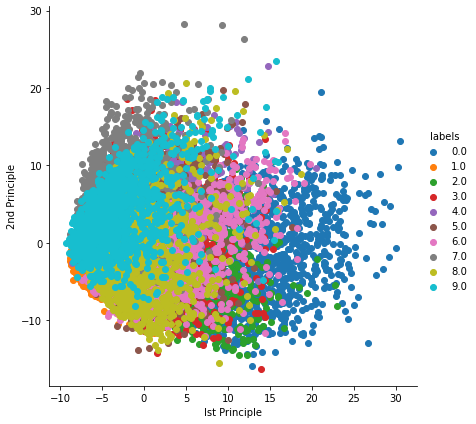

In [49]:
pca_data = np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data = pca_data, columns = ("Ist Principle","2nd Principle", "labels"))
sn.FacetGrid(pca_df, hue = "labels", size = 6).map(plt.scatter,"Ist Principle","2nd Principle").add_legend()
plt.show()

C:\Users\Public\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


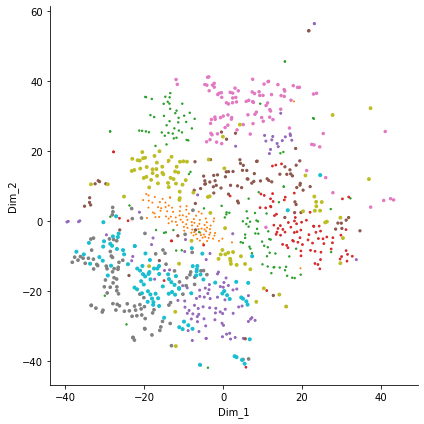

In [50]:
# t- sne dimensionality reduction technique:
from sklearn.manifold import TSNE
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1","Dim_2", "label"))
sn.FacetGrid(tsne_df, hue = "label",size = 6).map(plt.scatter, "Dim_1","Dim_2","label")